# Shopify Data Science Intern Challenge
## Nicholas Indorf
January 19, 2022

# Question 1

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# read csv file
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
# any nulls? no
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
# convert column to datetime, cuz why not
df['created_at'] = pd.to_datetime(df['created_at'])

In [5]:
# everything checks out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [6]:
# descriptive stats for the columns
df.describe(datetime_is_numeric=True)

,order_id,shop_id,user_id,order_amount,total_items,created_at
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,2017-03-15 22:20:37.076199936
min,1.000000,1.000000,607.000000,90.000000,1.00000,2017-03-01 00:08:09
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,2017-03-08 07:08:03.750000128
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,2017-03-16 00:21:20.500000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,2017-03-23 10:39:58.249999872
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,2017-03-30 23:55:35
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,NaN


## Part a.
(whole section for this question, not just this markdown cell)

Thoughts:
- This dataset exists entirely within the one month of March 2017. This makes calculating the Average Order Value (AOV) for one month relatively simple.
- There is at least one wild outlier in the order amounts that contributes to the absurdly high AOV. I'll investigate this further.

In [7]:
# taking a look at the dataset
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


<AxesSubplot:>

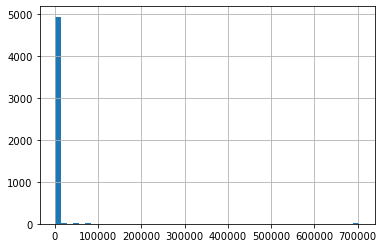

In [8]:
# histogram of all order amounts
# wow, definitely some outliers
df['order_amount'].hist(bins=50)

In [9]:
# sorting by order amount and by time
ordsort = df.sort_values(['order_amount','created_at'],ascending=[False,True])
ordsort

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
...,...,...,...,...,...,...,...
4219,4220,92,747,90,1,credit_card,2017-03-25 20:16:58
4183,4184,92,844,90,1,debit,2017-03-26 04:22:39
2503,2504,92,935,90,1,credit_card,2017-03-28 02:30:26
590,591,92,967,90,1,debit,2017-03-28 22:56:23


In [10]:
# lets see the top 60 orders and amounts
ordsort.head(60)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


My word, the top buyer orders an absurd number of shoes (almost $12 million worth, with an order placed slightly more frequently than every other day on average). Either this guy is building a house entirely out of footwear or they're a major retailer. 

The other top orders are also nothing to shake a stick at.

In [11]:
# taking a look at descriptive stats for the top 60 users' order amounts
# sorted by mean order amount descending
df.groupby('user_id')['order_amount'].describe().sort_values('mean', ascending=False).head(60)

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
607,17.0,704000.000000,0.000000,704000.0,704000.00,704000.0,704000.00,704000.0
878,11.0,14266.909091,46460.399857,94.0,215.00,266.0,326.00,154350.0
766,10.0,8007.600000,24303.270613,128.0,257.50,350.0,439.50,77175.0
834,18.0,6019.000000,24178.588557,127.0,245.00,333.0,381.50,102900.0
915,14.0,5785.142857,20547.778689,112.0,179.75,328.0,417.00,77175.0
962,14.0,5743.428571,20559.812640,117.0,160.25,194.0,348.50,77175.0
775,16.0,5069.625000,19228.897364,112.0,147.50,170.0,449.25,77175.0
817,16.0,5061.750000,19230.891331,111.0,139.25,191.5,349.50,77175.0
928,16.0,5041.750000,19235.839490,112.0,141.00,230.0,336.50,77175.0


In [12]:
# descriptive stats for top 60 users' order amounts
# sorted by max order amount descending
df.groupby('user_id')['order_amount'].describe().sort_values('max', ascending=False).head(60)

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
607,17.0,704000.000000,0.000000,704000.0,704000.00,704000.0,704000.00,704000.0
878,11.0,14266.909091,46460.399857,94.0,215.00,266.0,326.00,154350.0
834,18.0,6019.000000,24178.588557,127.0,245.00,333.0,381.50,102900.0
969,23.0,3663.869565,16025.543846,132.0,167.50,320.0,466.50,77175.0
915,14.0,5785.142857,20547.778689,112.0,179.75,328.0,417.00,77175.0
787,25.0,3428.280000,15364.746140,156.0,264.00,352.0,408.00,77175.0
928,16.0,5041.750000,19235.839490,112.0,141.00,230.0,336.50,77175.0
962,14.0,5743.428571,20559.812640,117.0,160.25,194.0,348.50,77175.0
775,16.0,5069.625000,19228.897364,112.0,147.50,170.0,449.25,77175.0


### Answer for what is going wrong with the naive calculation
So, it would seem we have outliers at 704000, 154350, 102900, 77175, 51450, and 25725.

After that, the highest order value goes way down to 1760, and the next max order totals seem to decrease in a somewhat linear fashion.

<AxesSubplot:>

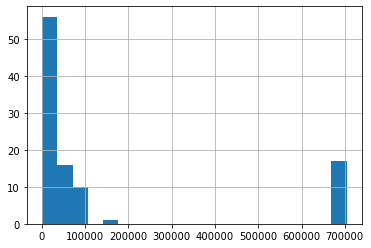

In [13]:
# histogram of the top 100 order amounts
# we can see the outliers more clearly represented
ordsort.head(100)['order_amount'].hist(bins=20)

<AxesSubplot:>

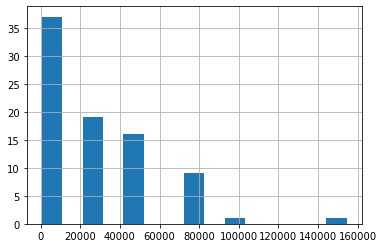

In [14]:
# removing the top 17 order totals (the 704k orders)
# we can see the other 5 outlier order totals here
ordsort[17:100]['order_amount'].hist(bins=15)

<AxesSubplot:>

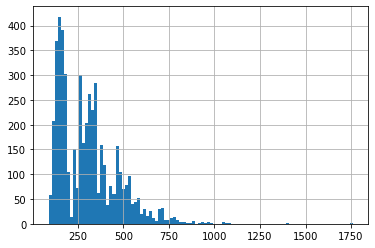

In [15]:
# removing all outlier values reveals a more expected distribution
df[df['order_amount'] < 25725]['order_amount'].hist(bins=100)

In [16]:
# calculating skewness
st.skew(df[df['order_amount'] < 25725]['order_amount'])

1.2520359257703857

### Answer for a better way to evaluate the data
We have shown two things to be true:
1. There are some relatively very high outliers present in the data.
2. Even with them gone, the data is quite skewed to the right (with a skewness of ~1.25).

This leaves us with a decision to make as to how we can best represent our data with a single measure of central tendency. I see two options:
1. The easiest way would be to deem the mean as overly influenced by the outliers and right-skew, and simply use the median or the mode. These are not as easily influenced by the higher values, and would be more representative of a "typical" order amount.
2. If you really need to use the average for some reason, you can remove outliers at a certain cutoff and recalculate the AOV. The disadvantage of this option is that by removing the outliers, you are losing data that you later might wish you preserved.

In [17]:
# Option 1
median = df['order_amount'].median()
mode = df['order_amount'].mode().values[0]
print(f"Median: ${median:.2f}")
print(f"Mode: ${mode:.2f}")

Median: $284.00
Mode: $153.00


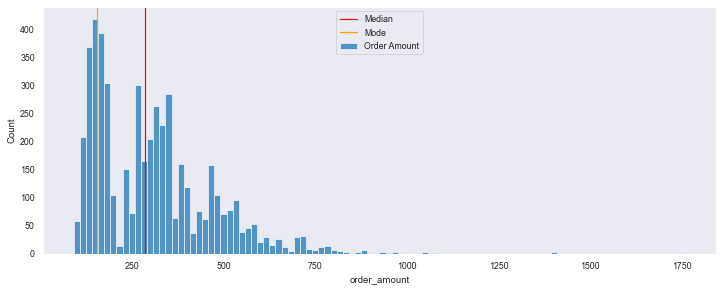

In [18]:
# visualizing the median and mode for the data (outliers not included)
sns.set_style('dark')
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(10,4))
plt.tight_layout()
sns.histplot(df[df['order_amount'] < 25725]['order_amount'], bins=100, 
             ax=ax, label='Order Amount')
ax.axvline(median, color='red', label='Median')
ax.axvline(mode, color='orange', label='Mode')
ax.legend(loc='upper center');

Whether to use the median or mode depends on downstream applications. If you're looking for the most common order amount, you'd want the mode. The disadvantage of this is that it sits quite low in the distribution, and is maybe not the most descriptive metric since it doesn't say anything about the higher values in the right-skewed distribution.

Let's say that for option 1 we'll use the median. The advantages to this is that (like the mode) it uses all the available data (unlike option 2 below), but unlike the mode it captures more information about the higher values in the distribution.

In [19]:
# Option 2
dfno = df[df['order_amount'] < 25725] # dfro = 'dataframe no outliers'
mean = df['order_amount'].mean()
meanno = dfno['order_amount'].mean()
print(f"Naive Mean: ${mean:.2f}")
print(f"Mean with no outliers: ${meanno:.2f}")

Naive Mean: $3145.13
Mean with no outliers: $302.58


As you can see, the mean when you remove the outliers is significanly lower, and more in line with the bulk of the data.

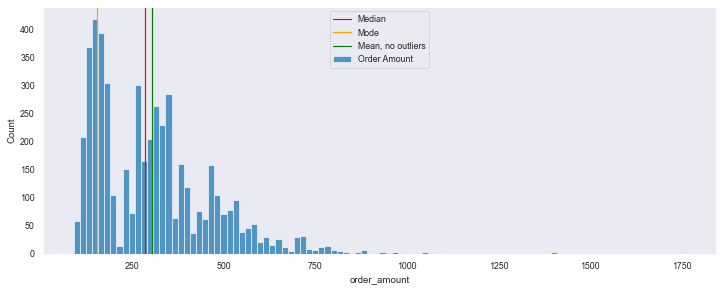

In [20]:
# visualizing the median, mode, and mean no outliers for the data (outliers not included)
sns.set_style('dark')
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(10,4))
plt.tight_layout()
sns.histplot(df[df['order_amount'] < 25725]['order_amount'], bins=100, 
             ax=ax, label='Order Amount')
ax.axvline(median, color='red', label='Median')
ax.axvline(mode, color='orange', label='Mode')
ax.axvline(meanno, color='green', label='Mean, no outliers')
ax.legend(loc='upper center');

## Conclusion, Parts b. and c.

So, all things considered, which is the best metric to use, out of the above? Well, as I mentioned, median is probably preferred for most circumstances over the mode. This leaves us to compare the median vs. the mean with outliers removed.
- Median: \$284.00
- Mean, no outliers: $302.58

These numbers are so close in value, only differing by ~6.3%. In my mind, the only reason we might still choose to use the mean with no outliers is because we might find it a better fit for the data for some reason. Since the median and mean with no outliers are roughly the same value, the median is the stronger choice as our metric, since this does not involve the removal of data.

# Question 2

Part a.
```{SQL}
SELECT COUNT(OrderID)
FROM Orders o
	JOIN Shippers s on o.ShipperID = s.ShipperID
WHERE ShipperName = 'Speedy Express';
```
> 54

Part b.
```{SQL}
SELECT LastName, COUNT(OrderID)
FROM Orders o
	JOIN Employees e on o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID
ORDER BY COUNT(OrderID) DESC
LIMIT 1;
```
> Peacock, 40 orders

Part c.
```{SQL}
SELECT ProductName, COUNT(o.OrderID)
FROM Orders o
	JOIN OrderDetails od ON o.OrderID = od.OrderID
   		JOIN Products p ON od.ProductID = p.ProductID
    JOIN Customers c ON o.CustomerID = c.CustomerID
WHERE Country = 'Germany'
GROUP BY p.ProductID
ORDER BY COUNT(o.OrderID) DESC
LIMIT 1;
```
> Gorgonzola Telino, 5 orders